In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [38]:
# import csvs
readCrime = pd.read_csv('crimedata2.csv')
readCounty = pd.read_csv('NumberUnemployed.csv')
secondCrime = pd.read_csv('CrimeData.csv')
unemployment = pd.read_csv('PercentUnemployed.csv')
laborForce = pd.read_csv('TotalEmployment.csv')

In [39]:
# Convert county names to lower case
readCrime['county'] = readCrime['county'].str.lower()
secondCrime['county'] = secondCrime['county'].str.lower()
readCounty['county'] = readCounty['county'].str.lower()
laborForce['county'] = laborForce['county'].str.lower()
unemployment['county'] = unemployment['county'].str.lower()

# Remove space and county from county list
readCounty['county'] = readCounty['county'].map(lambda x: x.rstrip(' county'))
laborForce['county'] = laborForce['county'].map(lambda x: x.rstrip(' county'))
unemployment['county'] = unemployment['county'].map(lambda x: x.rstrip(' county'))

# Add two crime dataframes together and reset index
combCrime = readCrime.append(secondCrime)
combCrime.reset_index(inplace=True)

# Merge county dataframes with county dataframe, percents with that, and population with that
mergedDF = pd.merge(readCounty, combCrime, on=['state','county','Year'], how='inner')
percentDF = pd.merge(mergedDF, unemployment, on=['state','county','Year'])

# Grab only columns we want
finalDF = pd.merge(percentDF, laborForce, on=['state','county','Year'])

# Make Pretty
selectColumnsDF = finalDF[['Year', 'state', 'county', 'Average (Monthly) Number Unemployed', 
                         'Average (Monthly) Percent Unemployed', 'count', 'Average Total Employment']]
formattedDF = selectColumnsDF.rename(columns={'state': 'State', 'county': 'County', 
                            'Average (Monthly) Number Unemployed': 'Average Number Unemployed',
                           'Average (Monthly) Percent Unemployed': 'Average Percent Unemployed',
                           'count': 'Number of Crimes', 'Average Total Employment': 'Total Labor Force'})

# Show
formattedDF.head()

,Year,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force
count,10758.000000,10758.000000,10758.000000,10758.000000,1.075800e+04
mean,2012.500000,4356.234136,7.394723,6257.532069,5.793133e+04
std,1.707905,17893.229119,3.033462,24785.866327,2.104187e+05
min,2010.000000,3.750000,1.108333,0.000000,6.616667e+01
25%,2011.000000,339.333333,5.158333,224.000000,4.978708e+03
50%,2012.500000,898.250000,7.020833,942.000000,1.167400e+04
75%,2014.000000,2501.125000,9.175000,3345.500000,3.311985e+04
max,2015.000000,615100.666700,28.850000,583109.000000,5.004087e+06


In [50]:
formattedDF.to_csv("EmploymentVsCrime.csv")

,Year,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
count,10758.000000,10758.000000,10758.000000,10758.000000,1.075800e+04,10758.000000
mean,2012.500000,4356.234136,7.394723,6257.532069,5.793133e+04,9.243188
std,1.707905,17893.229119,3.033462,24785.866327,2.104187e+05,22.900057
min,2010.000000,3.750000,1.108333,0.000000,6.616667e+01,0.000000
25%,2011.000000,339.333333,5.158333,224.000000,4.978708e+03,3.904883
50%,2012.500000,898.250000,7.020833,942.000000,1.167400e+04,7.141903
75%,2014.000000,2501.125000,9.175000,3345.500000,3.311985e+04,11.485284
max,2015.000000,615100.666700,28.850000,583109.000000,5.004087e+06,531.928125


In [41]:
formattedDF['Crimes Per 100 Workers'] = (formattedDF['Number of Crimes'] / formattedDF['Total Labor Force'])*100
formattedDF.head()

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
0,2010,AL,lee,6005.750000,9.025000,7107,66764.16667,10.644932
1,2011,AL,lee,5503.583333,8.050000,9148,68315.50000,13.390812
2,2012,AL,lee,4671.250000,6.766667,8036,68918.25000,11.660192
3,2013,AL,lee,4144.250000,5.858333,7441,70523.00000,10.551168
4,2014,AL,lee,3987.000000,5.566667,7671,71372.16667,10.747887


In [51]:
formattedDF.describe()

,Year,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
count,10758.000000,10758.000000,10758.000000,10758.000000,1.075800e+04,10758.000000
mean,2012.500000,4356.234136,7.394723,6257.532069,5.793133e+04,9.243188
std,1.707905,17893.229119,3.033462,24785.866327,2.104187e+05,22.900057
min,2010.000000,3.750000,1.108333,0.000000,6.616667e+01,0.000000
25%,2011.000000,339.333333,5.158333,224.000000,4.978708e+03,3.904883
50%,2012.500000,898.250000,7.020833,942.000000,1.167400e+04,7.141903
75%,2014.000000,2501.125000,9.175000,3345.500000,3.311985e+04,11.485284
max,2015.000000,615100.666700,28.850000,583109.000000,5.004087e+06,531.928125


In [42]:
year2010DF = formattedDF[formattedDF['Year']==2010]
year2011DF = formattedDF[formattedDF['Year']==2011]
year2012DF = formattedDF[formattedDF['Year']==2012]
year2013DF = formattedDF[formattedDF['Year']==2013]
year2014DF = formattedDF[formattedDF['Year']==2014]
year2015DF = formattedDF[formattedDF['Year']==2015]

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
0,2010,AL,lee,6005.750000,9.025000,7107,66764.166670,10.644932
6,2010,AL,bibb,1020.416667,11.425000,658,8934.000000,7.365122
12,2010,AL,dale,1947.750000,8.833333,2160,22071.250000,9.786487
18,2010,AL,hale,971.666667,15.091667,362,6445.083333,5.616685
24,2010,AL,pike,1478.916667,9.441667,2865,15676.916670,18.275277


Slope = 0.566325449388647
R Value = 0.07275797261944456
P Value = 0.0020507041895515073


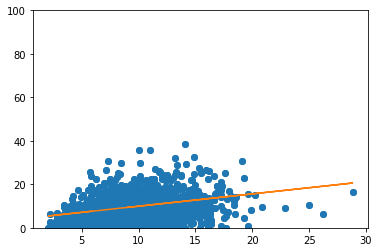

In [49]:
plt.scatter(year2010DF['Average Percent Unemployed'], year2010DF['Crimes Per 100 Workers'])
x = year2010DF['Average Percent Unemployed']
y = year2010DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.plot(x,y,'o', x, line)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.6846559077716751
R Value = 0.09228485369926263
P Value = 9.103493487300678e-05


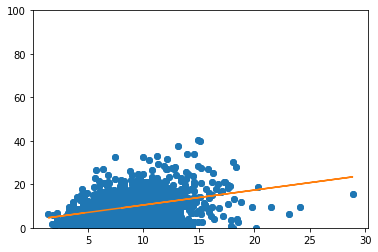

In [44]:
plt.scatter(year2011DF['Average Percent Unemployed'], year2011DF['Crimes Per 100 Workers'])
x2 = year2011DF['Average Percent Unemployed']
y2 = year2011DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
line2 = slope*x2+intercept

plt.plot(x2,y2,'o', x2, line2)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.6464665879800361
R Value = 0.07898000671127121
P Value = 0.0008162834673088378


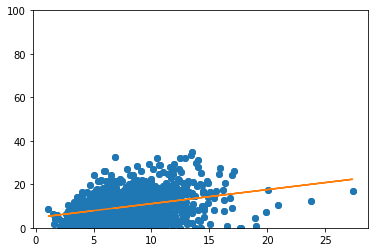

In [45]:
plt.scatter(year2012DF['Average Percent Unemployed'], year2012DF['Crimes Per 100 Workers'])
x3 = year2012DF['Average Percent Unemployed']
y3 = year2012DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
line3 = slope*x3+intercept

plt.plot(x3,y3,'o', x3, line3)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.5171366417500852
R Value = 0.061966796279712716
P Value = 0.008674975464955059


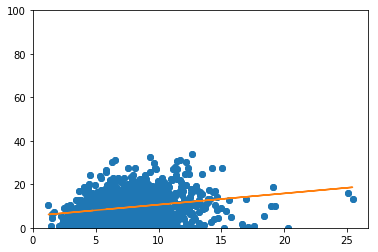

In [46]:
plt.scatter(year2013DF['Average Percent Unemployed'], year2013DF['Crimes Per 100 Workers'])
x3 = year2013DF['Average Percent Unemployed']
y3 = year2013DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
line3 = slope*x3+intercept

plt.plot(x3,y3,'o', x3, line3)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.6036062252541872
R Value = 0.06381230841682349
P Value = 0.006873158778874158


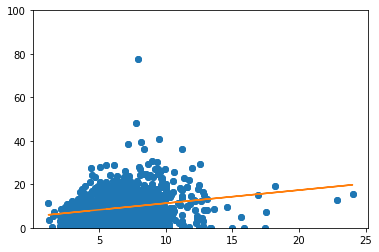

In [47]:
plt.scatter(year2014DF['Average Percent Unemployed'], year2014DF['Crimes Per 100 Workers'])
x4 = year2014DF['Average Percent Unemployed']
y4 = year2014DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x4,y4)
line4 = slope*x4+intercept

plt.plot(x4,y4,'o', x4, line4)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.6451824536269108
R Value = 0.06000576994733426
P Value = 0.011041191922882863


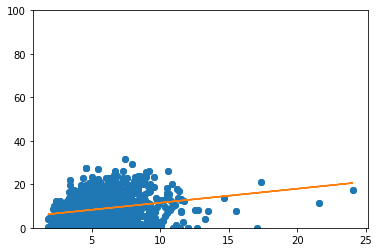

In [48]:
plt.scatter(year2015DF['Average Percent Unemployed'], year2015DF['Crimes Per 100 Workers'])
x5 = year2015DF['Average Percent Unemployed']
y5 = year2015DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x5,y5)
line5 = slope*x5+intercept

plt.plot(x5,y5,'o', x5, line5)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")